# Detectando Fraude
---

Como Analistas de Dados com especialidade em Machine Learning, suporemos que o chefe de uma loja de comércio eletrônico identificou muitas situações fraudulentas no último ano, e nos solicitou uma proposta de solução.

A primeira etapa usará bibliotecas Pandas, NumPy e SciPy para criar hipóteses. Começaremos com a aquisição dos dados dos clientes seguida da limpeza dos mesmos caso haja necessidade e depois faremos uma análise exploratória envolvendo visualização com Matplotlib e Seaborn.

Após a criação de algumas hipóteses do perfil de cliente que está causando as fraudes ou de atitudes que poderemos tomar para evitar, passaremos para a etapa de análise e modelagem.

Criaremos um modelo de previsão com um algoritmo supervisionado e outro não-supervisionado, o qual será implementado com os dados dos clientes já obtidos para conseguirmos prever se alguém estará envolvido em uma atividade fraudulenta no futuro ou não.

Por fim, seguindo nosso pipeline de análise de dados, teremos criado ideias e conclusões sobre ações a serem tomadas para apresentarmos ao chefe da loja.

Portanto, será um um projeto de uma situação real no qual utilizaremos todas as funções de um Analista de Dados, desde a definição do problema até nossas resoluções elaboradas com as informações extraídas ao longo das etapas.

In [1]:
import numpy as np
import pandas as pd
from scipy import special

import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
fraude_df = pd.read_csv("datasets/Fraud_Data.csv", header=0)

In [3]:
ISP_df = pd.read_csv("datasets/ipAddress_to_Country.csv", header=0)

In [4]:
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ISP_df.head()

,limite_inferior_ip,limite_superior_ip,pais
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Tipos de Dados dos DataFrames

In [6]:
fraude_df.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [7]:
ISP_df.dtypes

limite_inferior_ip    float64
limite_superior_ip      int64
pais                   object
dtype: object

### Detectando Valores Nulos

In [8]:
for col in fraude_df.columns:
    print("# de valores nulos em {}: {}".format(col, fraude_df[col].isnull().sum()))

# de valores nulos em id: 0
# de valores nulos em cadastro: 0
# de valores nulos em compra: 0
# de valores nulos em valor: 0
# de valores nulos em id_dispositivo: 0
# de valores nulos em fonte: 0
# de valores nulos em browser: 0
# de valores nulos em genero: 0
# de valores nulos em idade: 0
# de valores nulos em ip: 0
# de valores nulos em fraude: 0


### Estatísticas Descritivas 

In [9]:
fraude_df.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Na célula seguinte, faremos as mesmas análises para os dados de IP do segundo banco ISP_df. Portanto, é um arquivo que apresenta uma escala de IPs que é encontrado em cada país; ou seja, dependendo do número IP do usuário, poderemos indicar a localização observando em qual escala se encaixa.

Faremos o mesmo loop que aplicamos anteriormente para vermos os tipos de dados que temos neste arquivo. Chamaremos a variável col dentro de ISP_df.columns, e printaremos as variáveis "{}: {}" com format() recebendo a col para leitura das colunas e ISP_df[col].dtype.

In [10]:
for col in ISP_df.columns:
    print("{}: {}".format(col, ISP_df[col].dtype))

limite_inferior_ip: float64
limite_superior_ip: int64
pais: object


Desta forma, não está claro se limite_inferior_ip é realmente um número decimal ou se adicionaram um decimal 0, afinal a identidade IP é sempre um número inteiro por definição. Para conferir essa questão, definiremos uma pequena função lambda para diagnosticar essa análise.

Em uma nova célula, criaremos a variável ip_floats e definiremos em qual outra variável sera aplicada. Seguindo a lógica do maior para o menor, adicionaremos ISP_df.limite_inferior_ip com apply() após o sinal de =, que receberá lambda x sendo exatamente a variável que irá percorrer. Portanto, se o x não for integer() com not e is, somaremos com sum().

Em seguida, imprimiremos com print() o "Número de limites inferiores de endereço IP com decimal não-zero: {}" terminando com a extensão .format() que receberá ip_floats.

Executando essa linha, receberemos o retorno com a confirmação de que há diversos números inteiros com zeros decimais.

In [11]:
ip_floats = ISP_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()
print("Número de limites inferiores de endereço IP com decimal não-zero: {}".format(ip_floats))

Número de limites inferiores de endereço IP com decimal não-zero: 0


Portanto, converteremos toda a série para int. Para isso, selecionaremos o ISP_df seguido da variável limite_inferior_ip, sendo igual ao mesmo database com limite_inferior_ip.astype() para forçar o tipo de dado como inteiro.

In [12]:
ISP_df.limite_inferior_ip = ISP_df.limite_inferior_ip.astype(np.int64)

Rodaremos esta ação. Para termos certeza, verificaremos também os valores nulos deste banco de dados da mesma maneira que fizemos anteriormente, com o uso de for.

Como retorno, não teremos nenhum valor nulo, conforme esperávamos.

In [13]:
for col in ISP_df.columns:
    print("# de valores nulos em {}: {}".format(col, ISP_df[col].isnull().sum()))

# de valores nulos em limite_inferior_ip: 0
# de valores nulos em limite_superior_ip: 0
# de valores nulos em pais: 0


O próximo passo é analisar as estatísticas descritivas desse banco de dados também para chegar se há outliers. Se observarmos o resultado da execução de ISP_df.describe(), veremos que o valores mínimos do limite inferior e do superior são diferentes e separados por 25, o que faz sentido.

Porém, se olharmos os valores máximos, notaremos que aparentemente são iguais, o que já não faz tanto sentido; deveríamos ter um limite de IP inferior menor do que o superior.

In [14]:
ISP_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


Portanto, deveremos checar se realmente temos um outlier ou se é apenas um problema na apresentação da tabela. Para isso, usaremos a função display() que é bastante parecida com print(), selecionaremos o banco de dados ISP_df que estamos trabalhando, abriremos colchetes para adicionar ISP_.df com a variável limite_inferior_ip sendo == a ISP_df.limite_inferior_ip, para que assim possamos saber o valor igualitário com a função max().

Em seguida, faremos a mesma coisa para o limite superior.

Executando estas linhas, teremos duas colunas com ambas as informações solicitadas. Notaremos que os limites são diferentes, e a tabela anterior apenas mostrou números inteiros como se fossem floats, cortando o fim.

Portanto, não temos um outlier e poderemos dar continuidade.

In [15]:
display(ISP_df[ISP_df.limite_inferior_ip == ISP_df.limite_inferior_ip.max()])
display(ISP_df[ISP_df.limite_superior_ip == ISP_df.limite_superior_ip.max()])

,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


Perceberemos um ponto de estranhamento na utilização da função describe() nos bancos de dados.

Escreveremos novamente para vermos melhor as informações de IP máximo e mínimo. Agora, digitaremos a mesma função para o outro banco de dados fraude_df.

Executando esta linha, notaremos que os valores mínimos superiores e inferiores são diferentes dos valores mínimos encontrados no banco de dados de fraude.

Porém, pode ser que isso signifique que há valores faltantes. Portanto, a comparação de estatística descritiva de cada conjunto de dados nos fornece uma importante informação em relação aos outliers; essa diferença irá causar problemas quando criarmos um mapa definindo a origem de cada fraude.

Também é possível que algum dos endereços de IP no database de fraude não estejam em nosso arquivo ISP. Então seria bastante útil se pudéssemos fazer uma associação entre os dois bancos de dados.

Então faremos uma contagem associada a cada um dos erros e saberemos quantos endereços de IP possuem um país exclusivo atribuído a estes. Desta forma, poderemos saber quantos países geraram fraudes e quantas fraudes vieram de cada localidade.

Leremos nosso arquivo ISP_df e compararemos com nosso argumento de função. Faremos a leitura de todos os IPs do banco de dados de fraude através da criação de uma nova função, a qual realiza esse trabalho para saber se estão dentro da contagem de IPs do outro database.

In [16]:
ISP_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [17]:
fraude_df.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Em uma nova célula, definiremos com def a função isp_counts() com o argumento isp que trabalharemos. Dentro, criaremos a variável pais que contará as condições de leitura do ISP_df. O argumento deverá estar dentro dos limites inferiores e superiores para estar na lista de países que temos com .pais após os colchetes, desta forma:

Em seguida, começaremos uma condicional if para verificar se a variável pais é igual a 1, significando que estamos dentro das condições estabelecidas anteriormente. Utilizaremos a função shape[] que determinará uma tupla do tamanho ou formato da variável. Retornaremos a impressão de "Único".

Porém, pode ser que essa condição seja verdadeira em várias situações; usaremos a condicional elif para o caso da primeira opção não ser verdade, ou seja pais.shape[0] ser maior do que 1, o que significa que teremos vários países. Portanto, retornaremos o print() com "Vários países".

Há ainda outra condição em que pode ser igual a 0, e caso for, significará que teremos alguma condição estranha. Portanto, abriremos outra condicional if para esta última situação onde o número de linhas será igual a zero com nada identificado e o ISP_df será maior do que o máximo do limite superior, com o retorno da impressão "Muito grande". Assim, significará que o IP é maior do que a informação disponível sobre IPs de países, apontando para um caso de fraude com uma identificação falsa.

A outra elif será que o ISP_df poderá ser menor do que o mínimo do limite inferior, o que é igualmente problemático. Então, imprimiremos "Muito pequeno".

A última condição else verificará se realmente isp não está em nenhuma das situações colocadas, ou seja, teremos um problema onde não há número de IP; neste caso, escreveremos "Faltando".

Em seguida, geraremos outra variável chamada ip_counts que será igual ao banco de dados fraude_df, depois a variável ip e por fim aplicaremos a função isp_counts dentro de apply().

Finalmente faremos a contagem com ip_counts.value_counts().

Como retorno, veremos as impressões de acordo com os valores solicitados, o que nos dirá exatamente quais estão fora do que buscamos.

Ao final da execução dessa função, perceberemos que, embora a maioria dos endereços de IP esteja identificado exclusivamente, há muitos que estão faltando, o que pode acontecer por diversos motivos.

Agora que temos uma grande lista com todas as informações do mapeamento dos IPs, precisaremos criar uma outra função para que possamos determinar qual é o país dos IPs ausentes.

Embora seja possível descartar apenas as linhas com países de origem ausente, também é possível que esses endereços correspondam exatamente aos que foram gerados para criar uma fraude. Portanto, não poderemos simplesmente excluir essas informações como poderíamos fazer em outros casos de outliers.

Caso isso seja verdade, esperaremos que haja uma correlação entre esses dados, como veremos mais adiante.

In [18]:
def isp_counts(isp):
    pais = ISP_df[(ISP_df.limite_inferior_ip <= isp) & (ISP_df.limite_superior_ip >= isp)].pais
    if pais.shape[0] == 1:
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ISP_df.limite_superior_ip.max():
            return print("Muito grande")
        elif isp < ISP_df.limite_inferior_ip.min(): #estava errado com _min
            return print("Muito pequeno")
        else:
            return print("Faltando")

ip_counts = fraude_df.ip.apply(isp_counts)
ip_counts.value_counts()

Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Úni

Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Muito pequeno
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único


Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito 

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Úni

Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único


Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
M

Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único

Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muit

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muit

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único


Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único

Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Muito grande
Faltando
Faltando
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Mui

Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Ún

Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Faltando
Único
Faltando
Único
Único
Único
Ún

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Ún

Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Ú

Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Úni

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande


Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Mu

Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único


Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito g

Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito gra

Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Ún

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito 

Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito pequeno
Muito grande
Único
Único
Muito 

Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Muito grande
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito 

Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Muito grande
Faltando
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Muito grande
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Faltando
Único
Único
Muito grande
Muito grande


Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
F

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Únic

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Ún

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único


Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muit

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito gra

Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único


Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
M

Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Úni

Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Úni

Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Ún

Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Ún

Muito grande
Único
Muito grande
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grand

Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Úni

Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
M

Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Faltando
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Faltando
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Únic

Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Úni

Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande


Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único

Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Muito pequeno
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito pequeno
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Muito gran

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Muito grande
Faltando
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando

Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único


Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito gran

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Muito grande
Muito gr

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Ún

Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único


Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Únic

Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único


Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Muito grande
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
M

Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único


Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Faltando
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito

Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Faltando
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Úni

Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único

Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Ú

Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Faltando
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Únic

Series([], Name: ip, dtype: int64)

Então, manteremos as linhas e rotularemos o país de origem como faltante quando não houver. Para isso, definiremos outra função em uma nova célula chamada ip_para_pais(), cujo argumento será ip.

Criaremos uma variável temporária chamada tmp para ler ISP_df[] recebendo o banco com o limite_inferior_ip para ver se é menor ou igual ao ip. Também faremos a mesma condição para ver se o limite superior é maior ou igual ao IP.

Agora verificaremos com if se tmp.shape[0] é igual a 1, para então retornarmos exatamente a localização com a função iloc[0] dessa informação. Caso contrário, suporemos que a variável temporária seja menor do que 1 para retornar "Faltando".

Outra opção será para o caso de tmp for maior do que 1, o que retornará "Erro".

Com a execução dessa célula, leremos todos os endereços de IPs, e caso seja maior ou igual ao limite inferior e for menor ou igual ao superior, teremos 1 e escreveremos a informação obtida do nome do país. Caso seja menor que 1, significará que não temos nenhuma informação, ou seja, estará faltando. Se for maior, a mensagem de erro aparecerá.

Por fim, aplicaremos essa função ao banco de dados de fraude em uma variável chamada pais. Utilizaremos a variável ip e usaremos apply() com ip_para_pais que acabamos de criar.

In [19]:
def ip_para_pais(ip):
    tmp = ISP_df[(ISP_df.limite_inferior_ip <= ip)
            & (ISP_df.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0]
    elif tmp.shape[0] < 1:
        return print("Faltando")
    elif tmp.shape[0] > 1:
        return print("Erro")

fraude_df["pais"] = fraude_df.ip.apply(ip_para_pais)

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Na tabela retornada, teremos uma nova coluna chamada "pais" que nos fornece o nome do país resultante do mapeamento.

In [20]:
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


Antes de continuarmos, salvaremos essa versão completa e limpa para facilitar nossa futura análise exploratória dos dados nas próximas etapas sem precisarmos realizar essas ações novamente.

In [21]:
fraude_df.to_csv("datasets/Dados_fraude_com_pais.csv", index=False)
fraude_df = pd.read_csv("datasets/Dados_fraude_com_pais.csv", header=0)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### Análise Exploratória

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Como resultado, obteremos o gráfico com o número total de casos de fraude em função dos gêneros masculino e feminino. Como estabelecido no hue, o sistema indicará o que é e o que não é fraude com cores diferentes.

Observando a visualização, perceberemos que os homens compõe a maioria da base de clientes do E-commerce. Portanto, estes estarão envolvidos em mais casos de fraude do que em relação às mulheres que compõe a minoria dos clientes.

Analisando somente este único gráfico, não parece que um gênero ou outro está mais propenso a cometer fraudes por si só, e sim que se trata de uma questão basicamente numérica.

Text(0, 0.5, 'Casos')

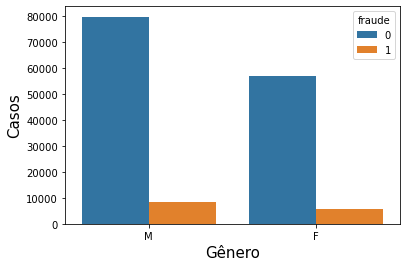

In [23]:
sns.countplot(x="genero", hue="fraude", data=fraude_df)
plt.xlabel("Gênero", fontsize=15)
plt.ylabel("Casos", fontsize=15)

Agora, tentaremos analisar a relação entre o valor de compra e a fraude. 

Observando a visualização, perceberemos que conseguimos produzir um gráfico que nos mostrará a média de valor de compra em cada um dos casos de fraude e não fraude. Embora haja um aumento muito pequeno no valor médio de compra associado à atividade fraudulenta apontados pelos pontos, as barras de erro são razoavelmente grandes para detectar uma tendência real. Aparentemente, ainda não temos informações consistentes.

Text(0.42499999999999716, 0.5, 'Valor de compra')

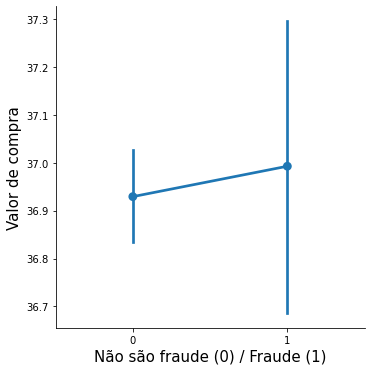

In [24]:
sns.catplot(x="fraude", y="valor", data=fraude_df, kind='point')
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

Então, exploraremos a relação entre idade no eixo y e fraude no eixo x. Executaremos a mesma coisa em uma nova célula, desta forma:

No gráfico fornecido, parece que pode haver uma tendência útil, mas novamente o aumento é bastante sutil; apesar de os casos de fraude terem uma média de idade um pouco maior dos que os casos de não fraude, a informação estará dentro das barras de erro inclusive. Portanto, não poderemos tirar nenhuma conclusão efetiva.

É interessante que façamos essas análises que nos fornecerão informações de que não é possível extrair uma situação de causa e consequência, pois também é relevante tanto quanto a constatação de uma correlação.

Text(-5.950000000000003, 0.5, 'Idade')

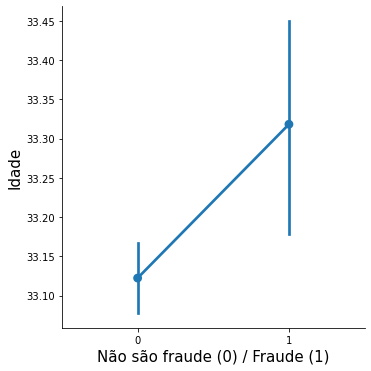

In [25]:
sns.catplot(x="fraude", y="idade", data=fraude_df, kind='point')
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Idade", fontsize=15)

Agora, faremos uma análise relacionada ao tipo de origem ou fonte de marketing e da fraude. Novamente aplicaremos a mesma metodologia usada no countplot() anterior, com a legenda do eixo x como "Fonte de marketing" e y como "Contagem.

Perceberemos que, de forma geral, não parece existir uma fonte específica mais associada às fraudes. Porém, há menos fontes diretas associadas a fraude, pois são a minoria no geral.

Portanto, a diminuição provavelmente tem a ver com a campanha não ser tão bem sucedida quanto a otimização dos mecanismos de pesquisa e anúncio para atrair clientes ao site, o que fornece o dado à equipe de marketing da empresa de que realmente os usuários tendem a chegar na companhia mais por conta dos algoritmos do que anúncios, o que pode gerar mais campanhas fora da internet para aumentar a parte de "Direct".

Text(0, 0.5, 'Contagem')

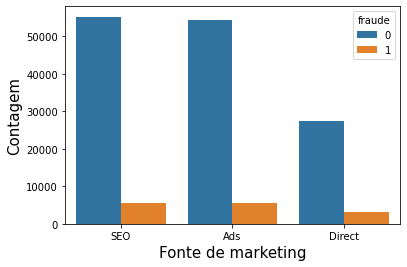

In [26]:
sns.countplot(x="fonte", hue="fraude", data=fraude_df)
plt.xlabel("Fonte de marketing", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

### Metodologia de Agrupamento

Como queremos analisar as fraudes, usaremos uma metodologia de agrupamento para unir parcelas de instâncias anormais pela qual cada localidade é responsável.

Para isso, criaremos dois novos dataframes em uma nova célula: um chamado sums_f sendo igual ao fraude_df[], o qual receberá fraude_df[] para puxar a variável "fraude" quando for igual a 1, ou seja, os casos de ["fraude"] com a função groupby() recebendo o agrupamento por pais e aplicação da soma com sum().

No outro dataframe, puxaremos os index que já temos com a função to_frame() seguido de reset_index() para que o sistema saiba as variáveis que trabalharemos.

Em seguida, faremos a mesma coisa para os casos de não fraude com sums_nf, que será igual a fraude_df[] recebendo esse mesmo banco como "fraude" quando for igual a 0, seguido do agrupamento por pais e soma da mesma forma. Por fim, faremos a mesma coisa para este caso no uso de to_frame(), e assim o sistema identificará as variáveis também.

In [27]:
sums_f = fraude_df[fraude_df["fraude"] == 1]["fraude"].groupby(fraude_df.pais).sum()
sums_f = sums_f.to_frame().reset_index()

In [28]:
sums_nf = fraude_df[fraude_df["fraude"] == 0]["fraude"].groupby(fraude_df.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

Nesta parte do código, estamos usando a função groupby() para identificar qual a soma dos dados com fraude e sem fraude. Criaremos dois novos bancos de dados para fazermos um gráfico de barras usando essas informações de fraude.

Em uma nova linha, chamaremos duas novas variáveis f e ax para podermos usar uma função dentro do gráfico sem precisarmos escrever tudo novamente, caso quisermos. Serão iguais a subplots() que receberão a definição do tamanho da imagem como tendo quase as mesmas dimensões da célula, ou seja, figsize igual a (20,25).

Em seguida, determinaremos as cores através de sns.set_color_code() recebendo "muted". Vale lembrar que há várias paletas disponíveis para escolher na documentação do Seaborn, acessível neste link. https://seaborn.pydata.org/tutorial/color_palettes.html

Também usaremos o barplot() com o eixo x sendo "fraude", o y como "pais" e usaremos como data os dados de fraude sums_f. A legenda label será composta de "Total" e cor preta "b".

O nome do xlabel() será "Contagem" com fontsize de 15. Já o outro eixo será nomeado como "Países" com mesmo tamanho de fonte.

Como retorno, receberemos um grande gráfico organizado em ordem alfabética agrupado por países, e cada barra representa a soma das fraudes em cada um. Aparentemente, alguns lugares como Estados Unidos e Reino Unido possuem mais casos fraudulentos, mas não poderemos identificar esse fato como uma possível variável-foco, pois não sabemos efetivamente qual é o percentual de ocorrências.

Portanto, nossas próximas atividades serão as análises das variáveis com maior profundidade através do agrupamento de dados ou visualizações avançadas.

Text(0, 0.5, 'Países')

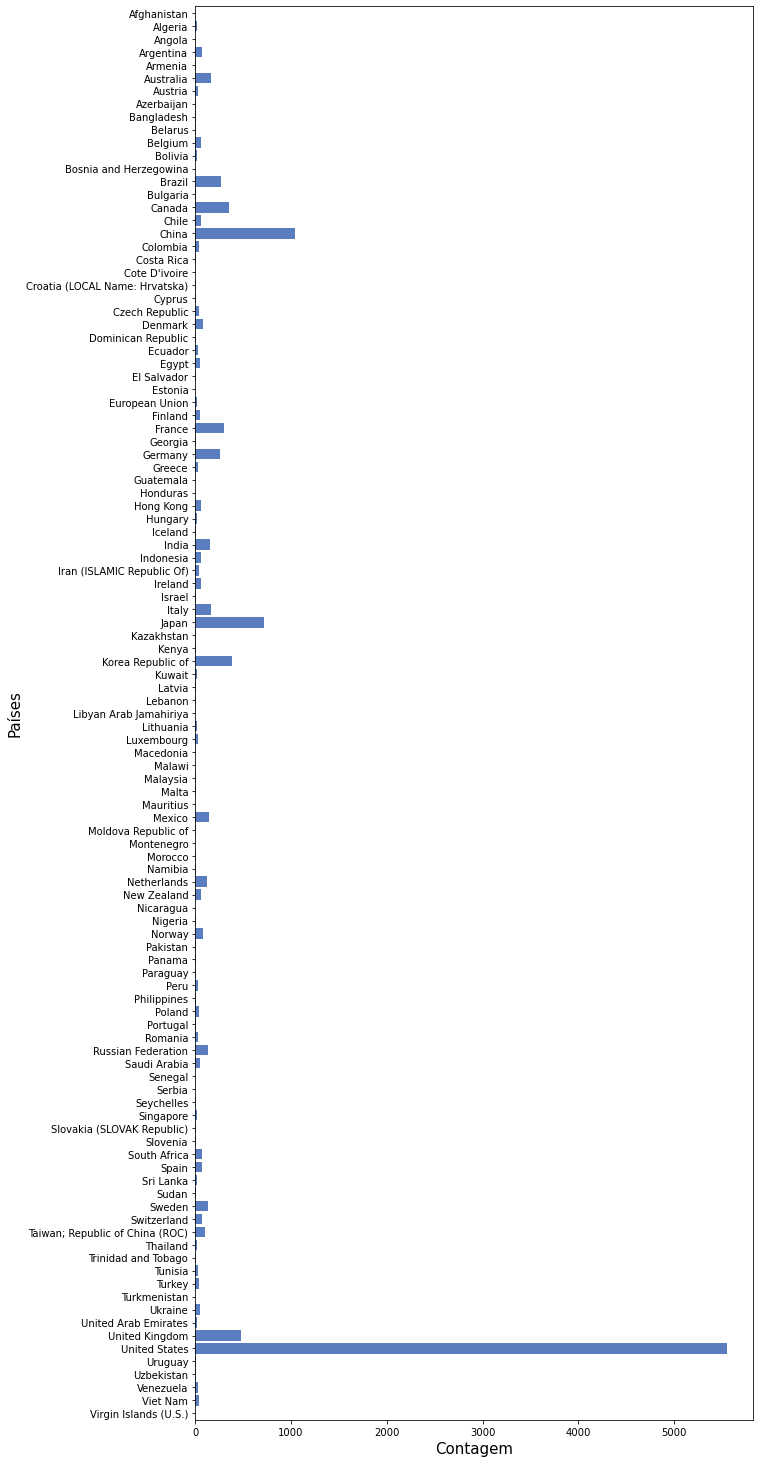

In [29]:
f, ax = plt.subplots(figsize=(10,26))
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f,
            label="Total", color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)

### Relação entre o número de IDs dos usuários exclusivos que estão associados a um único dispositivo ou único endereço de IP

Nesse momento, exploraremos a relação entre o número de IDs dos usuários exclusivos que estão associados a um único dispositivo ou único endereço de IP. Para isso, usaremos a função groupby() novamente, mas sem aplicar a soma. Contaremos apenas o número de IDs por cliente para cada dispositivo e para cada IP.

Criaremos um novo dataframe chamado tmp_df para chamar DataFrame() de pd, o qual receberá a determinação das columns, sendo uma "fraude", outra "id_por_dispositivo" e a última "id_por_ip".

Na linha seguinte, escreveremos tmp_df[] recebendo a variável "fraude" que será exatamente igual ao banco fraude_df que já temos.

As próxima variável se chamará userid_count, onde pegaremos o banco de dados de fraude e agruparemos pela "id_dispositivo", contando quantos teremos com id.count().

Por fim, adicionaremos essa informação "id_por_dispositivo" em tmp_df[], sendo igual a fraud_df com id.dispositivo para lê-la no banco de dados. Aplicaremos novamente um lambda x, o qual será a função userid_count[] recém-criada.

Faremos exatamente a mesma coisa para a outra variável. A chamaremos de userid_count2 para diferenciá-la e agruparemos por "ip" seguido da contagem id.count().

Copiaremos o resultado de tmp_df[] em "id_por_ip" e utilizaremos apply() com a seleção da variável ip, recebendo lambda x para aplicar userid_count2 em x. Executaremos para detectar a presença de algum bug em nosso código.

In [30]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraude_df["fraude"]

userid_count = fraude_df.groupby("id_dispositivo").id.count()
tmp_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraude_df.groupby("ip").id.count()
tmp_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count2[x])

Com tudo funcionando corretamente e com as novas informações criadas, poderemos iniciar as visualizações.

Em uma nova célula, usaremos o catplot() para o gráfico que fornece dados estatísticos nesse caso, principalmente a média. O eixo x será "fraude", o y será a variável "id_por_dispositivo" e utilizaremos o novo banco de dados tmp_df.

O xlabel() será Não fraude para 0, Fraude será 1 e a fonte terá corpo 15. Já o ylabel() receberá "ID de usuário por dispositivo" com o mesmo fontsize.

Para facilitar a etapa seguinte, copiaremos e colaremos as três linhas de código na sequência, pois a única alteração será usar id_por_ip ao invés de id_por_dispositivo e mudar a legenda de y para "ID de usuário por endereço IP"

Text(16.424999999999997, 0.5, 'ID de usuário por endereço IP')

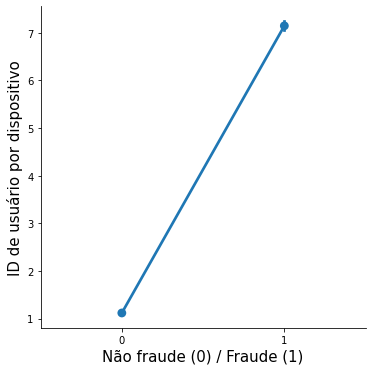

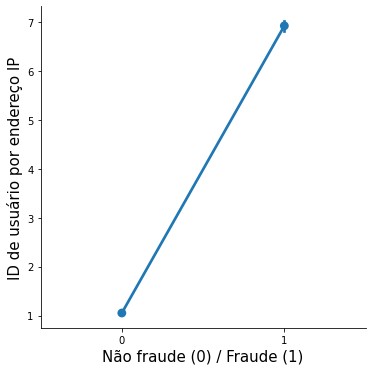

In [31]:
sns.catplot(x="fraude", y="id_por_dispositivo", data=tmp_df, kind='point')
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por dispositivo", fontsize=15)

sns.catplot(x="fraude", y="id_por_ip", data=tmp_df, kind='point')
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por endereço IP", fontsize=15)

Como retorno da execução do código, receberemos dois gráficos e perceberemos correlações bastante claras e importantes entre ambos; vários IDs de usuários associados a um ID de dispositivo único ou a um endereço IP nos fornecem um grande indicador de comportamentos fraudulentos.

Essa observação faz sentido, pois se tivermos uma só pessoa realizando compras no E-commerce, teremos apenas um ID e um dispositivo, ou um ID e um endereço de IP, ou seja, caso haja um ID de usuário associado a vários dispositivos ou endereços de IP, é possível entender que há diversas pessoas ou robôs manipulando a conta.

Analisando os gráficos, veremos uma média de 7 IDs por dispositivo ou endereço de IP. Pode ser que haja um mesmo computador com um IP próprio conectado em uma mesma rede que está utilizando várias contas, o que indica fraudes também.

A seguir, analisaremos a relação entre o tempo da inscrição de compra e a fraude.

### Tempo da inscrição de compra e a fraude

Neste passo, exploraremos a relação entre o tempo da inscrição de compra e a fraude. Para isso, utilizaremos a função Datetime() importada anteriormente, a qual converterá o tempo do banco de dados em objetos de data e hora, o que facilitará nosso trabalho.

Também criaremos uma nova variável chamada tempo que identificará a demora da usuária ou usuário para realizar o cadastro e posteriormente a compra.

Começaremos adicionando a variável "cadastro" ao banco de dados tmp_df[], sendo igual a fraude_df.cadastro com aplicação da função Pandas chamada to_datetime, a qual fará a identificação tanto da data quanto da hora, e também separará as informações.

Em seguida, adicionaremos a variável "compra" ao mesmo database, que corresponderá ao tempo de compra com aplicação da mesma função.

Adicionaremos mais uma coluna "tempo" já citada, a qual será a diferença de tempo entre o cadastro e a compra. Portanto, será compra menos cadastro seguido de apply() recebendo lambda x para sabermos o tempo decorrido em segundo através da função seconds.

In [32]:
tmp_df["cadastro"] = fraude_df.cadastro.apply(pd.to_datetime)
tmp_df["compra"] = fraude_df.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

Com tudo funcionando como esperado, poderemos gerar as visualizações na célula seguinte.

Usaremos catplot() novamente, adicionando o eixo x como "fraude" e eixo y como "tempo", tendo os dados do banco tmp_df. Aplicaremos o mesmo nome e tamanho de fonte para xlabel(), enquanto para ylabel() veremos o "tempo entre início e compra (segundos)" com mesmo fontsize.

Executaremos esta célula e obteremos o gráfico. Perceberemos que, quando se trata de uma não fraude, o tempo entre o cadastro e a compra é maior, pois é necessário entrar em um website e preencher com os dados pessoais e de pagamento na página, o que acarreta certa demora.

Nos casos de fraude, o tempo corresponde a menos da metade do tempo necessário para as situações regulares. Então, também são correlações claramente importantes, pois prova que essa diferença está fortemente relacionada com atividades fraudulentas também.

Portanto, teremos muitas informações para fazermos outras análises que abarcam o dia da semana, hora do dia, semana do ano e etc.

Text(-9.075000000000003, 0.5, 'Tempo entre início e compra (segundos)')

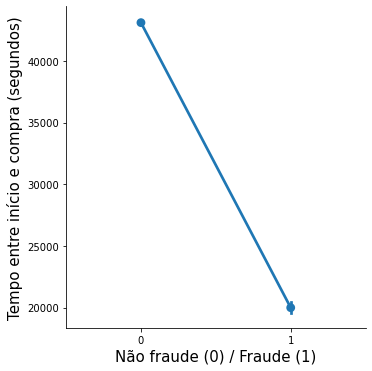

In [33]:
sns.catplot(x="fraude", y="tempo", data=tmp_df, kind='point')
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize=15)

Após executar essa linha, teremos uma tabela com os casos de fraude ou não, e quantidade de IDs por dispositivo e por IP. Observando os números, veremos o caso de 12 IDs que realizou o cadastro e a compra em apenas 1 segundo, o que é humanamente impossível e confirma a fraude.

Agora, analisaremos a hora do dia em que as fraudes costumam acontecer. Adicionaremos tpm_df[] que receberá tpm_df[] contendo "fraude" quando for igual a 1. Também pegaremos o tempo de cadastro e aplicaremos lambda x em horas com x.hour, para terminar plotando um histograma hist().

O xlabel() será nomeado como "Hora do dia" com mesmo fontsize dos anteriores, enquanto o ylabel() será "Contagem" com o mesmo tamanho de fonte.

In [34]:
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Text(0, 0.5, 'Contagem')

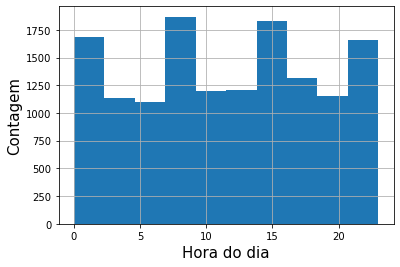

In [35]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel("Hora do dia", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Como retorno, receberemos a informação das horas do dia em que as situações de fraude mais significativas começam a acontecer. Aparentemente, há uma correlação que não faz muito sentido em relação aos momentos do dia.

Faremos uma análise em relação aos dias da semana também. Aplicaremos a mesma metodologia anterior, alterando x.hour por x.dayofweek e colocando "Dia da semana" na nomenclatura do eixo x.

Text(0, 0.5, 'Contagem')

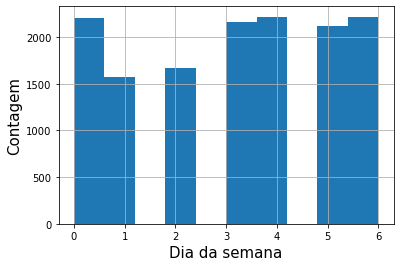

In [36]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Desta forma, teremos mais informações, e parece que a fraude acontece com bastante regularidade tanto ao longo das horas do dia quanto dos dias da semana. Agora, analisaremos a quantidade de fraudes por semanas do ano para avaliar se algum período festivo possui maior ocorrência, por exemplo.

Faremos a mesma coisa, escrevendo x.week no lugar de x.dayofweek e "Semana do ano" em xlabel().

Como resultado, veremos que há um enorme número de ocorrências de fraude nas primeiras semanas do ano que correspondem aos períodos de Natal e Ano Novo. Porém, não teremos certeza de que isso será um recurso útil em nosso conjunto de dados, afinal é uma época quando muitos clientes regulares costumam fazer compras no E-commerce.

Portanto, é mais apropriado simplesmente recomendar que a equipe de segurança da empresa esteja sempre em alerta máximo durante as primeiras três semanas do ano.

Text(0, 0.5, 'Contagem')

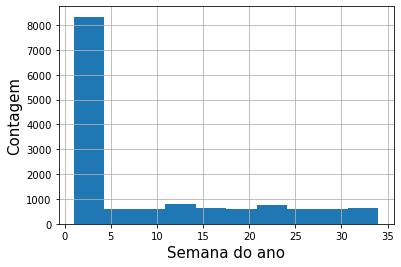

In [37]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel("Semana do ano", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

### Engenharia de Recursos

Primeiramente, identificaremos e determinaremos quais serão as variáveis mais relevantes para o modelo, mas também geraremos outras novas a partir das informações que temos.

Vale lembrar que já fizemos uma análise importante quando constatamos que, aparentemente, ter vários IDs de usuário para um único dispositivo ou endereço de IP exclusivo são bons indicadores de fraude. Entretanto, ainda são dados que estão correlacionados.

Para evitar qualquer multicolinearidade, geraremos apenas um recurso que será a média do número de IDs de usuários associados ao ID do dispositivo ou ao endereço de IP.

Em uma nova célula, da mesma maneira que já realizamos, adicionaremos uma nova variável chamada userid_count3 que será usada como lambda x, sendo igual a fraude_df.groupby() recebendo "id_dispositivo" seguido de id.count().

Na linha seguinte, escreveremos fraude_df[] para criar a variável "id_por_dispositivo", que será igual ao banco de dados com id_dispositivo . Aplicaremos lambda x com a nova variável.

Em seguida, digitaremos o head() do banco fraude_df para vermos como está.

In [38]:
userid_count3 = fraude_df.groupby("id_dispositivo").id.count()
fraude_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count3[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


Com a execução deste comando, veremos a criação da nova coluna id_por_dispositivo.

Na célula seguinte, adicionaremos outra coluna que será relacionada ao número de IP por meio da variável userid_count4 que conterá "ip" em groupby(), criará "id_por_ip" em fraude_df[] e possuirá ip na aplicação.

In [39]:
userid_count4 = fraude_df.groupby("ip").id.count()
fraude_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count4[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1


Executando o código, visualizaremos uma nova coluna id_por_ip.

Por fim, adicionaremos uma média para as duas colunas chamada "media_id" em fraude_df[], que será id_por_dispositivo somado ao id_por_ip e dividido por dois ou multiplicado por 0.5 neste caso.

Feito isso, teremos mais uma coluna, a qual será a única com mais relevância para não precisarmos ficar adicionando variáveis desnecessariamente.

In [40]:
fraude_df["media_id"] = (fraude_df.id_por_dispositivo + fraude_df.id_por_ip) * 0.5

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0


Em seguida, converteremos o tempo de inscrição e compra em objetos de data e hora com to_datetime, da mesma forma como fizemos no banco de dados temporário, mas dessa vez usaremos o total.

Depois replicaremos a mesma linha e substituiremos cadastro por compra, visto que os comandos são os mesmos.

Também adicionaremos uma nova coluna para o número de segundos entre o "tempo" de cadastro e o de compra, como também já vimos anteriormente no banco de dados temporário com a expressão e aplicação de lambda para escrevermos em seconds. Por fim, escreveremos o head().

In [41]:
fraude_df.cadastro = fraude_df.cadastro.apply(pd.to_datetime)
fraude_df.compra = fraude_df.compra.apply(pd.to_datetime)
fraude_df["tempo"] = (fraude_df.compra - fraude_df.cadastro).apply(lambda x: x.seconds)

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461


Agora, separaremos a coluna pais em diversas outras chamadas dummies, lembrando que a variável dummie é categória que será transformada em numérica. Ou seja, a variável pais é categórica, pois temos várias categorias que representam cada localidade. A questão é que iremos transformá-las em colunas numéricas, então criaremos a quantidade de colunas correspondentes ao número de países existentes. Quando um país for especificado, terá valor 1, e os demais terão 0.

A ideia é que possamos adicionar uma variável categórica nos modelos numéricos, caso necessário.

Em uma nova célula, criaremos pais.dummies. A biblioteca Pandas possui a função get_dummies() que receberá as variáveis pais e o prefix igual a 'pais', para que as novas colunas sejam criadas com este prefixo.

Em seguida, concatenaremos o banco de dados original e o novo pais_dummies com concat() para que fiquem juntos. Nessa mesma linha, o axis será igual a 1. Com head() veremos o resultado na execução.

Como resultado, veremos as várias colunas criadas para cada um dos países.

O problema agora é que teremos muitas colunas para trabalhar, e precisaremos remover aquelas que não nos fornecem informações relevantes.

In [42]:
pais_dummies = pd.get_dummies(fraude_df.pais, prefix='pais')
fraude_df = pd.concat([fraude_df, pais_dummies], axis=1)

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,...,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,1,0,0,0,0,0,0,0,0,0


Nesta aula, veremos matematicamente quais serão as variáveis que realmente importam. Porém, já poderemos fazer uma análise baseada no que vimos anteriormente, como gênero, valor da compra, fonte, browser e idade que não são dados interessantes o suficiente. Além disso, vimos que o número de ID, ID do dispositivo, hora de cadastro e compra podem parecer importantes ou não, dependendo do tipo de análise que estamos fazendo.

Então, o primeiro passo é remover as informações que acreditamos não ser relevantes. Para isso, usaremos a função drop() no banco de dados, e basta escrevermos o nome das variáveis que queremos eliminar, desta forma:

Essas são exatamente as variáveis que trabalhamos na análise exploratória, as quais não possuem relevância em nosso objetivo. Executando esta célula, teremos excluído as colunas indesejadas.

Porém, continuamos com mais de 150 colunas. Para reduzir essa quantidade, aplicaremos a Seleção de Recursos, mas é importante fazê-la sobre os recursos reais que iremos usar.

In [43]:
fraude_df.drop(["id",
            "cadastro",
            "compra",
            "id_dispositivo",
            "ip",
            "id_por_dispositivo",
            "id_por_ip",
            "pais",
            "fonte",
            "browser",
            "genero",
            "idade",
            "valor"], axis=1, inplace = True)

### Seleção de Recursos

Como fizemos no passo anterior, os algoritmos de detecção de anomalias que usaremos se beneficiarão de recursos mais gaussianos.

O primeiro é o número médio de IDs de usuário, o qual será bimodal conforme veremos. Uma representação desse tipo possui dois picos na curva do gráfico, ou seja, há dois modos como se houvesse dois máximos e não apenas um.

Quando a flag de fraudes for igual a 1 em nosso banco fraude_df, veremos como o histograma se distribui com a media_id. O normed será True e ajustaremos o tamanho em bins para 25.

Em seguida, nomearemos o eixo x com o "Número médio de IDs" com fontsize sendo 15 e o ylabel() será a "Contagem normalizada" com o mesmo tamanho de fonte.

Como retorno, veremos que o que temos é razoavelmente parecido; há um grande pico entre 1.0 e 1.5, e em seguida teremos uma distribuição gaussiana, ou seja, uma distribuição normal centrada por volta de 12 com o desvio padrão de aproximadamente 3.

Devido à natureza bimodal, não há muito o que fazer para tornar o gráfico mais gaussiano ou normal, pois temos um pico inicial. Portanto, é como se tivéssemos uma curva com dois modos, mas um deles é bastante concentrada enquanto o outro é bem mais espalhado.

Text(0, 0.5, 'Contagem normalizada')

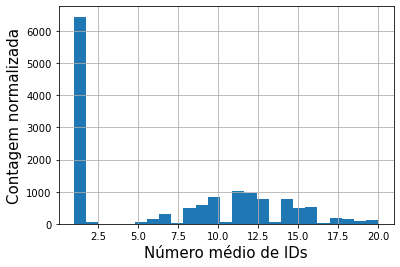

In [44]:
fraude_df[fraude_df["fraude"] == 1].media_id.hist(bins=25)
plt.xlabel("Número médio de IDs", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

Também precisaremos observar a distribuição do recurso de tempo. Faremos a mesma coisa para o intervalo entre o cadastro e a compra em segundos, nomeando o eixo x como "Tempo de compra e inscrição (segundos)" e o y da mesma forma que o código anterior.

No retorno, teremos números distribuídos uniformemente, tirando o início que provavelmente está relacionado aos casos de fraude em que o tempo é de apenas 1 segundo. Mas queremos transformá-los em valores com distribuição gaussiana ou seja, de forma normal.

Text(0, 0.5, 'Contagem normalizada')

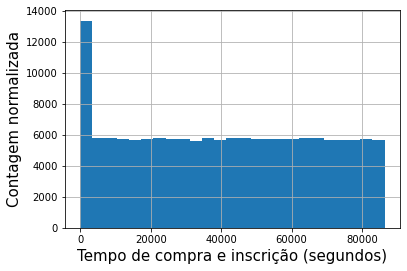

In [45]:
fraude_df.tempo.hist(bins=25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

Para fazer isso, usaremos a seguinte transformação que pode ser encontrada em artigos científicos que explicam melhor seu funcionamento, como Remarks on a Multivariate Transformation de Murray Rosenblatt e Transformation of arbitrary distributions to the normal distribution with application to EEG test–retest reliability escrito por S.J. van Albada.

<img src="https://images2.imgbox.com/ba/4a/HrXaBNXX_o.png" width="900">

Basicamente, o phi será uma variável aleatória uniformemente distribuída como vemos no gráfico, quase como uma linha reta. Já o X será dessa mesma forma conforme queremos obter, enquanto o erf elevado a -1 será o inverso da função-erro.

Antes que essa transformação possa ser feita, precisaremos primeiro normalizar o recurso para que fique entre zero e um a fim de facilitar as análises estatísticas. Há diversas formas possíveis, então esta em especial não é obrigatória.

Esse tipo de conversão mais voltada à análise estatística é usada para simplificar a construção do modelo e diminuir falhas. Portanto, existem diversas transformações possíveis se há qualquer dificuldade nessa questão, apesar desta apresentada ser um bom exemplo em situações com esse mesmo tipo de padrão, mas não é a única.

Tentaremos reescalar estes valores. Em uma nova célula, não utilizaremos nenhuma das funções prontas da Pandas, apesar desta já possuir funções de escalonamento. Porém, aqui construiremos uma nova justamente para entendermos melhor nosso cenário.

Definiremos uma função chamada rescale_series() cujo argumento será ser. Em seguida, definiremos o valor mínimo em ser_min, sendo igual a ser.min() menos 1e-5 para termos uma margem de erro como uma questão puramente numérica, o que não é obrigatório.

Na sequência, escreveremos ser_max para definir o máximo com a operação de soma com ser.max(). Depois, a nova série new_ser será o valor ser que temos, menos o valor mínimo dividido pelo máximo subtraindo o mínimo.

Por fim, aplicaremos lambda x com a equação np.sqrt(2)*special.erfinv(2*x - 1) para o retorno ser new_ser.


In [46]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser

Executaremos e aplicaremos em uma nova célula para plotarmos um histograma e vermos o resultado após nossa transformação.

O gráfico resultante se transformou em uma distribuição normal que facilitará nosso trabalho, mas continuaremos a ter aquele valor inicial que indica as fraudes.

Para reiterar, seria possível usarmos outras funções prontas de escalonamento de dados como a MinMaxScaler(). Mas ao usá-la, os valores acima de padronização constam como infinitos quando fazemos a transformação citada.

Então, quando fazemos a conversão diretamente, os valores permanecem floats, o que simplifica a identificação do que realmente é um outlier e o que não é.

Do contrário, precisaríamos limpar o dataset novamente para remover esses infs, o que seria já uma outra análise para entender o que significam. Portanto, enquanto permanecem numéricos, poderemos simplesmente deixar-los para vermos o resultado sem manipular demais.

Text(0, 0.5, 'Contagem normalizada')

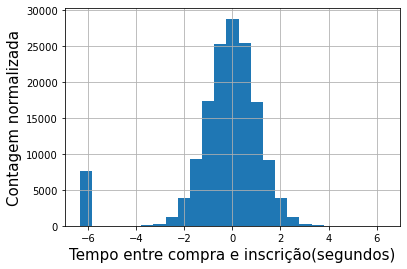

In [47]:
fraude_df["tempo"] = rescale_series(fraude_df.tempo)
fraude_df.tempo.hist(bins=25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

### Escalonamento

Neste passo, aplicaremos o escalonamento em nosso banco de dados de forma geral. Na célula seguinte, definiremos basicamente a mesma função rescale_serie(ser) mas sem a segunda parte da transformação com a equação vista anteriormente, pois somente transformaremos os valores para que fiquem entre zero e um.

Em seguida, obteremos todos os nomes de colunas que não são codificados, ou seja, todas menos a dos países que gerou os dummies.

Chamaremos de onehotencoded, pois é a nomenclatura comum dada para as colunas. Será igual a feature, que é composto basicamente pelas variáveis em fraude_df.columns, no caso de "pais" não estar em feature e esta for diferente da flag "fraude".

Redimensionaremos todas as colunas não codificadas, afinal as que são codificadas como pais e fraude já são binárias, e não faria sentido recodificá-las.

Para col em onhotencoded, a fraude_df[col] lerá todas as colunas. Usaremos o rescale_series() com a mesma variável.

Também criaremos dois bancos de dados: X e Y. O primeiro será composto pelas colunas que temos no caso de col ser diferente de "fraude", e o segundo será o target e o conjunto de treinamentos ou inputs dos modelos.

In [48]:
def rescale_series(ser):
    ser_min = ser.min()
    ser_max = ser.max()
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    return new_ser

onehotencoded = [feature for feature in fraude_df.columns if "pais" not in feature and feature != "fraude"]

for col in onehotencoded:
    fraude_df[col] = rescale_series(fraude_df[col])

    X = fraude_df[ [col for col in fraude_df.columns if col != "fraude"]]
    Y = fraude_df["fraude"]

Executaremos este código.

Salvaremos os bancos de dados X e Y para usarmos no futuro quando fizermos a análise da importância dos países no modelo, observando se realmente é importante termos todas as variáveis extras.

Em uma nova célula, usaremos a função to_csv() para ambos com a variável que queremos guardar e o nome que daremos, sendo os index iguais a False.

In [49]:
X.to_csv("datasets/X.csv", index=False)
Y.to_csv("datasets/Y.csv", index=False)

Com isso, o sistema criará os dois bancos de dados.

O problema é que temos mais de duzentos recursos até o momento. Portanto, utilizaremos a Seleção de Recursos com Classificador de Árvores Extras para reduzir este número.

O primeiro passo é importar somente o modelo ExtraTreesClassifier de sklearn.ensemble, para então criar uma instância do classificador que chamaremos de csf com o uso da função ExtraTreesClassifier(). Nesta, usaremos fit() com os dois bancos X e Y para determinar quais são as colunas mais importantes.

Então, criaremos um banco de dados para mapear os recursos e suas relevâncias. Chamaremos como features e geraremos o dataframe pd.DataFrame(), nomeando a variável como 'feature' que será igual às columns de X. A outra se chamará 'importância' e será o resultado do Classificador de Árvores Extras clf com feature_importances_ para já calcularmos a importância das variáveis automaticamente.

Por fim, imprimiremos os recursos mais relevantes quando features.importancia for maior do que a média np.mean() da importância, e os organizaremos de forma descendente por "importancia" com sort_values().

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_

features [features.importancia > np.mean(features.importancia)].sort_values(by="importancia", ascending=False)

,feature,importancia
1,tempo,0.703461
0,media_id,0.291190


Teremos duas respostas como resultado, e parece que realmente o tempo e a media_id são as variáveis mais significativas. Também constataremos que o país de origem não é relevante no final das contas.

Portanto, aprendemos que tanto a análise exploratória visual quanto a parte numérica são extremamente importantes e devem ser complementadas.

### Métricas de Performance

Quando começarmos a elaborar nossos modelos, precisaremos determinar qual é melhor e qual é pior, mas não somente em termos comparativos, pois também é preciso saber se estão performando bem ou não. Para isso, usaremos as chamadas Métricas de Performance.

A primeira dará vazão à criação das demais e é chamada Matriz de Confusão, a qual sempre terá quatro elementos no caso de modelos binários cuja saída é 1 ou 0, como em nossa situação.

As colunas serão representadas pela classe esperada com o valor real e as linhas serão organizadas pela classe prevista. Dois dos elementos estarão relacionados aos acertos do modelo, como nesta simulação:

<img src="https://images2.imgbox.com/fb/61/RqJC5eX1_o.png" width="500">

Neste caso, suporemos que temos várias imagens e o nosso modelo determinará se há presença de um gato ou não. Quando determinar de que se trata de um gato e realmente a imagem o conter, teremos o verdadeiro positivo no valor de 25. E quando determinar que não possui o gato e realmente a imagem não o tiver, obteremos o verdadeiro negativo de valor 40, ou seja, quando a saída é 0 e o modelo indica 0.

Ainda sobrarão dois elementos, sendo o primeiro correspondente à saída 0 quando realmente não há um gato e na realidade a saída é 1, teremos o falso negativo de valor 25 ou erro tipo 2. O segundo é o caso do modelo dizendo que a saída é 1 e na realidade o certo seria 0, ou seja, há detecção afirmativa de um gato quando não há nenhum, gerando o falso positivo valendo 10 ou erro tipo 1.

Essa Matriz de Confusão poderá nos fornecer algumas métricas; a primeira é a Precisão do modelo, que responde à pergunta:

"Dentre todas as classificações positivas que o nosso modelo fez, quantas estão corretas?"

Para calcular isso matematicamente, a Precisão será igual ao verdadeiro positivo dividido pelo resultado da somatória do verdadeiro positivo com o falso positivo.

`Precisão = verdadeiro positivo / (verdadeiro positivo + falso positivo)`

Também poderemos calcular a Sensibilidade ou Revocação com a questão contrária à anterior:

"Dentre todas as classificações positivas como valor esperado, quantas estão corretas?"

Pela matemática, essa métrica pode ser calculada através do resultado do verdadeiro positivo dividido pelo valor da soma do verdadeiro positivo e do falso negativo.

`Revocação ou Sensibilidade = verdadeiro positivo / (verdadeiro positivo + falso negativo)`

Teremos também a conhecida Acurácia, que leva à resposta da seguinte pergunta:

"Dentre todas as classificações, quantas o modelo acertou realmente?"

Para obter esse valor, somaremos os acertos dos verdadeiros positivos e negativos e dividiremos pelo somatório de todas as classificações.

`Acurácia = (verdadeiro positivo + verdadeiro negativo) / (verdadeiro positivo + falso positivo + verdadeiro negativo + falso negativo)`

Por fim, teremos a Medida F1 que é uma média harmônica entre a Revocação ou Sensibilidade e a Precisão, ou seja, pegaremos o produto da multiplicação das duas métricas e dividiremos pela somatória das mesmas, para então multiplicar por 2 para obtermos esse tipo de média.

`Medida F1 = 2[(Precisão) * (Sensibilidade) / (Precisão) + (Sensibilidade)]`

É muito importante saber quando usar cada uma, pois os modelos podem apresentar uma melhor Sensibilidade mas uma pior Acurácia por exemplo, e deveremos escolher em uma situação assim.

A Acurácia é uma boa indicação geral de como o modelo performou. Então, se apresentar um baixo valor, já teremos que lidar com este problema e nem valerá a pena calcular as demais métricas de performance.

A Precisão é interessante quando os falsos positivos forem mais prejudiciais do que os falsos negativos.

A Revocação ou Sensibilidade pode ser usada quando os falsos negativos são mais prejudiciais do que os falsos positivos, como é nosso caso.

Então se dissermos que um caso de fraude não o era, gerará transtornos para os negócios. Mas se pegarmos casos em que não eram fraude e o modelo determina que possivelmente é, basta fazer perguntas extras aos clientes envolvidos para resolver, o que não criará prejuízos significativos.

A Medida F1 é uma forma mais simples de observar as duas métricas da operação de forma única, sem precisarmos analisar tantas.

<img src="https://images2.imgbox.com/2d/7f/mCDz7SYd_o.png" width="700">

A última métrica que utilizaremos é a curva ROC, a qual representa a taxa de falsos positivos no eixo x e a de verdadeiros positivos no eixo y. Sempre teremos os pontos 0 e 1 e os 1 e 0 representados pela linha diagonal, que basicamente seria a "sorte", ou seja, se chutássemos todas as previsões. As curvas sempre devem ser côncavas, ou seja, acima da linha diagonal, e quanto mais distante desta melhor. O caso perfeito seria constituído de uma linha sobreposta ao eixo y que atinge até o valor 1,00, e qualquer bom modelo deve estar entre as duas últimas curvas citadas, de preferência o mais próximo possível do caso perfeito.

Já o AUC significa Area Under the Curve, ou seja, a Área Sob a Curva é uma forma numérica de quantificar essa curva. Então será a área sob a linha de casos perfeitos e o mais distante possível da linha de "sorte" para termos um bom modelo.

<img src="https://images2.imgbox.com/46/31/e0q7XcbG_o.png" width="600">

Com isso, estaremos prontos para começar a modelar e determinar se nossos modelos estão performando bem ou não, e qual é o melhor dentre eles.

### Modelagem

Há duas maneiras básicas de abordar a detecção de anomalias: a partir de uma perspectiva supervisionada e uma não-supervisionada.

Começando pela primeira, usaremos um algoritmo de Floresta de Isolamento, o qual isolará as observações selecionando aleatoriamente uma variável. Em seguida, selecionará outras variáveis de forma recursiva para tentar separar nossa amostra. Essa divisão pode ser representada como uma estrutura de árvore, na qual o número de separações será equivalente ao comprimento do caminho da raiz até o topo da árvore. A partir disso, quanto menor for essa medida, mais fácil será isolar a amostra e maior será a probabilidade de representar uma anomalia, pois teremos menos trabalho para separá-la.

Portanto, realizaremos uma validação cruzada cinco vezes para não rodar apenas uma vez, pois queremos saber sobre a performance com mais de uma execução. Usaremos a métrica F1 Score que será aprofundada mais adiante.

Antes, importaremos as bibliotecas do Scikit Learn que iremos usar. Como não a utilizaremos inteira, apenas faremos o import de RobustScaler da sub-biblioteca preprocessing, a qual removerá a mediana e dimensionará os dados de acordo com as faixas dos quartis, como uma forma de normalização.

Em seguida, importaremos train_test_split a partir de model_selection, que servirá para separar os dados de treinamento e de validação.

Depois será a vez de IsolationForest de ensemble e GridSearchCV a partir de model_selection, sendo este último responsável pela metodologia que usaremos para rodar várias vezes e encontrar os melhores recursos.

Também importaremos o classification_report, roc_auc_score do tamanho da área debaixo da curva ROC que veremos adiante, e o próprio roc_curve vindos da metrics. Desta mesma sub-biblioteca, importaremos a importante f1_score.

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import f1_score

Executando a célula, poderemos dividir os dados entre Treinamento e Teste para iniciarmos o treinamento da classe de Floresta de Isolamento.

Chamaremos o X_dev, X_eval, Y_dev e Y_eval que serão iguais a função train_test_split() com os dados X e Y, seguidos do tamanho percentual train_size de 0.75 e de random_state com qualquer número para definir uma semente começa sempre com as mesmas condições iniciais, pois do contrário teríamos resultados diferentes a cada vez.

A Floresta de Isolamento normalmente retorna valores de 1 para casos normais e -1 para casos anômalos. Portanto, precisaremos transformar os valores de destino para corresponderem aos que iremos obter.

Começando pelo Y_dev, usaremos apply() com lambda x como 1 se o x for igual a zero, e caso contrário será -1. A mesma coisa será feita com o Y_eval de avaliação para podermos executar a célula.

In [52]:
X_dev, X_eval, Y_dev, Y_eval = train_test_split(X, Y, train_size = 0.75, random_state = 23)
Y_dev = Y_dev.apply(lambda x: 1 if x == 0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x == 0 else -1)

Na célula seguinte, criaremos a nossa Floresta de Isolamento com IF, a qual será igual a função IsolationForest(). Como parâmetro, receberá o número de amostras máximas max_samples como automático, o percentual 0.095 em contamination que representa as amostras anômalas em nosso conjunto de dados de desenvolvimento, e o valor de random_state como 1 para mantermos as condições iniciais.

Também rodaremos com vários parâmetros para determinarmos quais são os melhores. Geraremos a variável param_grid para chamarmos os nove estimadores "n_estimators" ou número de árvores dessa floresta, que serão 100, 150, 200, 250, 300, 350, 400, 450, 500.

Agora, começaremos a definir o objeto da pesquisa pela variável clf com o GridSearchCV(), que receberá o modelo IF, os parâmetros param_grid, cv sendo 5 para que o cross validation rode cinco vezes, o n_jobs com número 10 de vezes em que rodará em paralelo, o scoring que usará o "f1" para determinar qual é o melhor, e por fim o verbose como 10 para que escreva o processo.

Para rodarmos a célula, sempre escreveremos _ = com o modelo clf para fitar os dados de treinamento X_dev e Y_dev.

In [53]:
IF = IsolationForest(max_samples="auto", contamination = 0.095, random_state=1)
param_grid = {"n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500]}

clf = GridSearchCV(IF,
                param_grid,
                cv=5,
                n_jobs=10,
                scoring="f1",
                verbose=10)

_ = clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Após o término da execução do código anterior, veremos os resultados obtidos.

Escreveremos IF_best que será composto pelos melhores parâmetros que conseguimos no IsolationForest, ou seja, clf.best_estimator_.

Em seguida, criaremos a variável Y_predicted que preverá o comportamento usando esses valores dos melhores com o IF_best.predict() recebendo X_eval.

Também definiremos a curva roc_auc com roc_auc_score() que será em função do target de teste Y_eval, o qual será testado com o melhor modelo Y_predicted.

Depois imprimiremos a função classification_report que dará as informações dos resultados e métricas. Será novamente em função do Y_eval e Y_predicted. Para nomear, digitaremos target_names como sendo "anômalo" e "normal".

Adicionaremos mais um print() com "Área sob a curva ROC: {}" com o formato :0, 3f entre as chaves e o format() com a variável roc_auc.

Por fim, computaremos a curva e a área sob esta em IF_probs sendo o IF_best.decision_function() com X_eval. Em seguida, definiremos os falsos positivos fpr, os verdadeiros positivos tpr, e o threshold do limite sendo iguais a roc_curve() recebendo Y_eval e IF_probs.

Feito isso, poderemos plotar com plt.plot() os falsos e os verdadeiros positivos, bem como lw sendo 1 para a largura da linha.

Em seguida, plotaremos uma linha resultante no caso de termos ido "na sorte", ou seja, se tivermos escolhido o que é fraude e o que não é aleatoriamente, afinal nosso modelo deverá apresentar resultados melhores.

Com outro plt.plot(), pegaremos a curva parametrizada ou diagonal, o tipo de linha como tracejado, as cores com valores 0.6, 0.6, 0.6 de RGB que queremos e o label escrito "sorte".

Ajustaremos os limites de x e y para -0.05, 1.05 com xlim() e ylim() para que não fiquem muito grandes.

Agora, escreveremos os nomes das legendas de nossos eixos com xlabel() sendo "Taxa de falsos positivos" com fontsize de 15 e ylabel() como "Taxa de verdadeiros positivos" com mesmo tamanho de fonte.

Finalmente, apenas adicionaremos um título "Curva ROC" com fontsize igual a 12 e mostraremos tudo junto com show()

              precision    recall  f1-score   support

     anomalo       0.48      0.48      0.48      3546
      normal       0.95      0.95      0.95     34232

    accuracy                           0.90     37778
   macro avg       0.71      0.71      0.71     37778
weighted avg       0.90      0.90      0.90     37778

Área sob a curva ROC: {:0, 3f} 0.7115178509877922


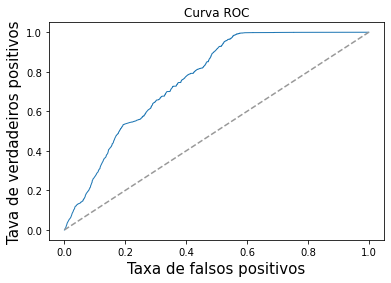

In [54]:
IF_best = clf.best_estimator_
Y_predicted = IF_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print (classification_report(Y_eval,
                Y_predicted,
                target_names=["anomalo","normal"]))
print("Área sob a curva ROC: {:0, 3f}", format(roc_auc))

IF_probs = IF_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, IF_probs)

plt.plot(fpr, tpr, lw=1)

plt.plot([0,1],[0,1], '--', color=(0.6,0.6,0.6), label="sorte")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("Taxa de falsos positivos", fontsize=15)
plt.ylabel("Tava de verdadeiros positivos", fontsize=15)
plt.title("Curva ROC", fontsize=12)

plt.show()

O primeiro elemento a rodar é o classification_report(), e já poderemos ver a Precisão, o recall, o f1_score e o suporte que nos dá as informações de contagem. Na sequência, teremos a curva e a Área Sob a Curva ROC.

A Precisão apresentou resultados muito semelhantes aos outros dois valores, o que é uma indicação ruim. A segunda métrica de Revocação é a frequência com a qual o nosso classificador encontrará os exemplo de uma classe, ou seja, responde a seguinte pergunta:

"Quando realmente faz parte da classe X e o quão frequentemente classificamos como tal?"

Pode ser que muitas vezes a precision piore ao melhorarmos a recall por exemplo, o que é natural; quanto maior o rigor para acertar ou melhorar a precisão, menos disposição teremos de errar ou aumentar a revocação também. Portanto, precisaremos tem um bom equilíbrio entre ambos com um valor intermediário que nos dê uma informação intermediária.

Também teremos os dados de micro avg e macro avg. Este primeiro também funciona como uma Acurácia do modelo.

A Área Sob a Curva não possui o melhor valor que poderíamos obter, pois é a capacidade discriminativa de um teste, ou seja, como classifica corretamente os anômalos e não anômalos, e quanto mais perto de 1, melhor.

Seu valor está entre 0.7 e 0.8, o que é regular; o ideal seria aumentá-lo. Portanto, quanto mais rápido nossa curva subir e quanto maior for a Área Sob a Curva, mais verdadeiros positivos e menos falsos positivos teremos, além de melhorarmos nosso modelo.

Poderemos ver que este modelo em específico funciona melhor do que no caso da "sorte", mas o importante é sabermos quais são os casos fraudulentos não identificados, pois é o que gerará prejuízos à empresa.

Muitas vezes não sabemos qual métrica utilizar, e realmente o tipo dependerá do problema; em nosso caso, temos uma curva ROC de aproximadamente 7.3 e talvez não seja ruim, basta analisarmos nossa Matriz de Confusão para ver se estamos identificando as fraudes corretamente.

Pode ser que percamos alguns clientes que não cometeram fraudes, mas o maior prejuízo para a empresa é realmente os casos fraudulentos não identificados.

Para checarmos a Matriz de Confusão, importaremos confusion_matrix de sklearn.metrics. Em seguida, chamaremos de cnf_matrix_IF para usarmos a função. Como parâmetro, passaremos o Y_eval de teste e o Y_predicted do melhor modelo. Por fim, imprimiremos o cnf_matrix_IF para podermos rodar o código.

In [55]:
from sklearn.metrics import confusion_matrix
cnf_matrix_IF = confusion_matrix(Y_eval, Y_predicted)
print(cnf_matrix_IF)

[[ 1694  1852]
 [ 1872 32360]]


Após a execução, teremos quatro números. Essa matriz possui a primeira linha com a informação de valores previstos e a segunda com a informação verdadeira. Cada posição na matriz corresponde aos falsos positivos e negativos, bem como aos verdadeiros positivos e negativos, conforme o exemplo anterior com a simulação de detecção de um gato nas imagens.

Em nosso caso, nossa preocupação é com o valor que contém o erro tipo 2 ou falsos negativos, onde o modelo prevê uma classe negativa quando é positiva na realidade.

A grande questão é sobre termos um resultado melhor no caso de usarmos um modelo não-supervisionado, ou seja, um modelo em que se busca identificar grupos ou padrões a partir de dados, sem um objetivo específico a ser alcançado.

Neste passo, iniciaremos o trabalho com o algoritmo não-supervisionado.

Por conta disso, a divisão do conjunto de dados será um pouco fora do padrão; todas as anomalias estarão presentes nos grupos de validação cruzada e de avaliação. Afinal, o modelo aprenderá um limite de decisão em torno apenas dos dados normais, e o que destoar será detectado como anômalo.

Esses conjuntos de validação e avaliação cruzadas serão uma mistura das instâncias normais e anormais.

Começaremos adicionando um vetor de destino X[] de volta ao conjunto de recursos "fraude" e colocando em Y. Em seguida, separaremos as anomalias dos demais com X_anomalias que será quando a 'fraude' for igual a 1, e depois com X_normal que será no caso da 'fraude' ser igual a 0.

Pegaremos amostras aleatórias de 70% dos índices dos conjuntos de dados normal para treinamento. Chamaremos de train_idxs e usaremos sample() para separar, criando uma list() que receberá X_normal com index para chamar o número da entrada e int() com 0.7 vezes X_normal.shape[0].

Quando temos uma matriz, o shape[] dará o formato. Em nosso caso, fornecerá a quantidade de amostras que temos.

Já X_train do treinamento será X_normal com a função loc[] para recebermos a localização da superior train_idxs.

Em seguida, guardaremos o resto para o conjunto de teste. Então X_testing será X_normal com drop() para excluir as informações de train_idxs que já temos.

Agora, o conjunto de teste deverá ser a combinação das instâncias normais restantes que não estão em treinamento e as da anomalia. Portanto, usaremos pd.concat() para concatenar X_testing e X_anomalias com axis igual a zero.

Iremos embaralhar as linhas para ambos os conjuntos. Então X_train será X_train com a função sample() com frac=1 da semente randômica para pegarmos uma CID e embaralharmos todas as informações. Em seguida, resetaremos o index com reset_index() recebendo drop=True para pegarmos os números de antes da sample e jogarmos fora. Faremos a mesma coisa com o teste X_testing.

Dividiremos o dataframe de teste em conjuntos de dados de validação cruzada e de avaliação. O target será o Y_testing com X_testing[] recebendo 'fraude', da mesma maneira feita anteriormente.

Já o X_testing será X_testing[] de col para col em X_testing.columns, caso a coluna for diferente de 'fraude' para copiarmos todas menos as fraudulentas.

Com isso, poderemos realizar a separação chamando X_cv, X_eval, Y_cv e Y_eval com o train_test_split() recebendo x_testing e Y_testing. O train_size será de 0.7 e o random_state será 23 para padronização com as demais.

Mapearemos os valores de Y para convenção de 1 como normal e -1 como anomalia, da mesma forma que fizemos com o IsolationForest. Portando, Y_cv será Y_cv com apply() de lambda x para o caso de 1 se x for igual a 0 e, caso contrário, será -1. Usaremos a mesma coisa para Y_eval.

Por fim, excluiremos a última coluna da classe do conjunto de treinamento X_train usando a mesma sentença de X_testing, e então poderemos rodar o código.

In [56]:
import random

X["fraude"] = Y

X_anomalias = X[X['fraude'] == 1]
X_normal = X[X['fraude'] == 0]

train_idxs = random.sample(list(X_normal.index), int(0.7*X_normal.shape[0]))
X_train = X_normal.loc[train_idxs]

X_testing = X_normal.drop(train_idxs)

X_testing = pd.concat([X_testing, X_anomalias], axis=0)

X_train = X_train.sample(frac=1).reset_index(drop=True)
X_testing = X_testing.sample(frac=1).reset_index(drop=True)

Y_testing = X_testing['fraude']
X_testing = X_testing [ [col for col in X_testing.columns if col != 'fraude']]

X_cv, X_eval, Y_cv, Y_eval = train_test_split(X_testing, Y_testing, train_size = 0.7, random_state=23)

Y_cv = Y_cv.apply(lambda x: 1 if x==0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x==0 else -1)

X_train = X_train[ [col for col in X_testing.columns if col != 'fraude']]

Encaixaremos os hiperparâmetros de validação cruzada neste passo.

Começaremos escolhendo um conjunto aleatório de hiperparâmetros para encaixar um modelo SVM não-supervisionado de uma classe nos dados de treinamento, o qual será ajustado para prever os valores do vetor-alvo do conjunto de validação cruzada.

Depois usaremos a pontuação F1 para otimizar a Precisão e a Revocação, para então compararmos as previsões com os valores verdadeiros que temos.

Da mesma forma que já conhecemos, definiremos a param_grid em uma nova célula para maior pesquisa, mas com parâmetros diferentes pois usaremos outro modelo também.

Passaremos "nu": com np.linspace() para criar um espaço linear recebendo 0.001, 0.01, 5, e o "gamma": irá variar [0.01, 0.03, 0.1, 0.3].

Em seguida, criaremos uma lista de parâmetros param_list que será uma list() com a função intertools.product() recebendo os param_grid tanto para o "nu" quanto para o "gamma". Este "nu" será um parâmetro superior na fração de pontos de treinamento fora de uma região.

In [57]:
param_grid = {"nu": np.linspace(0.001, 0.01, 5), "gamma": [0.01, 0.03, 0.1, 0.3]}

param_list = list(itertools.product(param_grid["nu"],param_grid["gamma"]))

Após executar essa célula, importaremos as ferramentas OneClassSVM de sklearn_svm no topo da nova célula. Com isso, definiremos uma função random_gridsearch() que fará o gridsearch efetivamente e receberá param_list, n_sample, X_train, X_cv, Y_cv.

O f1_max será definido como 0 e o param_list usará o sample() para pegar informações aleatórias.

Já o remaining_fits será o que falta de n_sample, ou seja, quantas vezes faremos o teste. Em seguida, aplicaremos for para os params na lista de parâmetros para inicializar a classe e setar os hiperparâmetros nu e gamma. Chamaremos de OCSVM como o modelo OneClassSVM() que utilizaremos, definindo o kernel como "rbf", nu sendo nu, gamma igual a gamma e a semente randômica como 1.

Em seguida, fitaremos o modelo com a impressão de 'Fitando modelo...' e chamaremos OCSVM.fit() com X_trains. Usaremos predict() para prever primeiro e depois calcularemos o f1_score() com Y_cv.values, cv_preds, average="binary".

Também poderemos otimizar o score se f1 for** maior** do que f1_max para que sempre atualize quando f1_max for igual a f1.

Depois, o melhor modelo OCSVM_best será OCSVM para achar quando teremos o melhor f1, os remaining_fits serão menos iguais a 1 e retornaremos tanto o f1_max quanto o resultado do SVM.

Por fim, pediremos que escreva o f1_max e o melhor resultado de OCSVM_best. Chamaremos a função random_gridsearch() com a lista de parâmetros rodando em 10, com o treinamento e validação cruzada de X, bem como Y_cv.

In [61]:
from sklearn.svm import OneClassSVM

np.random.seed(1)

def random_gridsearch(param_list, n_sample, X_train, X_cv, Y_cv):

    f1_max = 0
    param_list = random.sample(param_list, n_sample)
    remaining_fits = n_sample
    
    for params in param_list:
        nu, gamma = params
        OCSVM = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        print('Fitando modelo...')
        OCSVM.fit(X_train)

        cv_preds = OCSVM.predict(X_cv)
        f1 = f1_score(Y_cv.values, cv_preds, average="binary")

        if f1 > f1_max:
            f1_max = f1
            OCSVM_best = OCSVM

            remaining_fits -=1

    return f1_max, OCSVM

f1_max, OCSVM_best = random_gridsearch(param_list, 10, X_train, X_cv, Y_cv)

Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...


Com o fim dessa execução, poderemos fazer o relatório de classificação completa e produzir a curva ROC da mesma foma como fizemos no caso do algoritmo supervisionado.

Em uma nova célula, chamaremos OCSVM_best e fitaremos X_train com a função fit(). Criaremos a variável Y_predict que será os melhores parâmetros de SVM quando usarmos a função predict() no X_eval.

A curva ROC será a roc_auc_score() com uma comparação entre Y_eval e Y_predicted previsto. Com isso, imprimiremos o classification_report usando estes últimos parâmetros com os nomes dos targets sendo 'anormais' e 'normais'.

Também printaremos a área sob a curva da mesma forma que já conhecemos, e escreveremos como float com três casas decimais entre chaves. Depois, aplicaremos format() para colocarmos a variável roc_auc que queremos escrever.

Agora, computaremos a curva em si através da criação da variável OCSVM_probs, que será igual a função decision_function() recebendo o X_eval para os melhores parâmetros.

Em seguida, chamaremos os falsos positivos fpr, os positivos verdadeiros tpr e a margem threshold para ser a roc_curve() recebendo tanto o Y_eval quanto a função OCSVM_probs recém-criada.

Com isso, poderemos começar a plotar chamando plt.plot() com os falsos e verdadeiros positivos, grossura da linha como 1 e legenda sendo 'ROC'.

Também faremos a diagonal da "sorte" que irá de [0,1] e [0,1], será tracejada, as cores em tons de cinza e legenda 'sorte'.

Ajustaremos o gráfico colocando os limites xlim() em [-0.05, 1.05] e os ylim() da mesma forma.

Por fim, definiremos as legendas dos eixos e tamanho de fonte do gráfico, adicionando o título 'Curva ROC e visualizando o resultado na sequência com plt.show().

              precision    recall  f1-score   support

    anormais       0.99      0.38      0.55      4179
     normais       0.83      1.00      0.90     12393

    accuracy                           0.84     16572
   macro avg       0.91      0.69      0.73     16572
weighted avg       0.87      0.84      0.81     16572

Área sob a curva ROC: {:0.3f} 0.6878773760677834


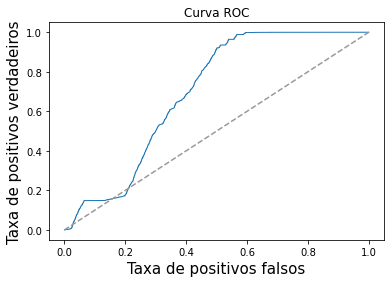

In [64]:
OCSVM_best.fit(X_train)

Y_predicted = OCSVM_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

OCSVM_probs = OCSVM_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, OCSVM_probs)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

Executando esta parte, receberemos nossa área sob a curva e as informações de Precision, Recall e f1-score. Notaremos que nosso modelo é bem melhor para identificar situações normais do que anormais.

Em nosso caso, o que importa é sabermos os Erros Tipo 2 apresentados em análises pela Matriz de Confusão. Portanto, imprimiremos a confusion_matrix() usando o Y_eval e o Y_predicted.

In [65]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 1575  2604]
 [   14 12379]]


A matriz apresentada nos mostra o valor de 1979 referente aos Erros Tipo 2 dos casos em que o modelo não identifica situações fraudulentas quando realmente existem. Já o Erro Tipo 1 é bem menor sob o valor de 50, mas ainda assim o Tipo 2 é maior do que o caso do primeiro algoritmo supervisionado.

Portanto, já poderemos traçar os limites de decisões e poderemos chegar a algumas conclusões parciais: primeiramente, nem todos os endereços de IP do conjunto de dados podem ser rastreados para um país de origem. Além disso, parece que essa localidade não representa uma informação importante para a identificação de fraudes.

Construímos dois modelos: o algoritmo supervisionado Floresta de Isolamento que apresentou um resultado de um pouco mais de 1700 indivíduos de falsos negativos, e o não-supervisionado Máquina de Vetores de Suporte de Classe baseado no aprendizado de um limite de decisão em torno dos dados anômalos que nos apresenta um erro maior.

A questão é que sempre conseguimos melhorar nosso trabalho; já sabemos que as caraterísticas mais importantes foram a velocidade em que o indivíduo se movimenta no funil de vendas, ou seja, a demora da inscrição até a compra, e se vários IDs de usuários foram gerados a partir de um único dispositivo ou endereço de IP.

A seguir, veremos como melhorar nossos modelos e determinaremos que tipo de resultado poderemos apresentar ao proprietário da empresa para evitar fraudes.

Anteriormente, fizemos dois testes modelando um método supervisionado chamado Floresta de Isolamento que identificou 1744 situações de falsos negativos que geram prejuízos à empresa, e também o não-supervisionado SVM que apontou 1979 casos da mesma natureza.

Notaremos que o método supervisionado é melhor neste caso, pois vimos que há variáveis correlacionadas com as fraudes. Porém, a questão é saber se o que utilizamos é a melhor opção disponível entre estes tipos de algoritmos.

Pode ser que não precisemos de um modelo avançado efetivamente, e uma versão mais simples da Floresta de Isolamento seja mais adequada, como a Árvore de Decisão. Portanto, tentaremos usá-la para analisar os resultados.

Começaremos importando o modelo DecisionTreeClassifier de sklearn.tree. Chamaremos a variável de decision_tree para chamar a função DecisionTreeClassifier() recebendo a semente inicial randômica igual a 1. Em seguida, fitaremos X_dev e Y_dev.

Criaremos Y_predicted que será a predict() da nova variável com X_eval. Adicionaremos todos os elementos necessários para a avaliação, como o roc_auc sendo igual a roc_auc_score() com tanto o Y_eval quanto Y_predicted como parâmetros.

Determinaremos as validações cruzadas de cv_preds com predict() de decision_tree no X_cv. Depois, imprimiremos o relatório de classificação com o Y_eval, Y_predicted e os target_names.

Imprimiremos a 'Área sob a curva ROC': {:0.3f}' seguido de format() recebendo roc_auc. Depois, criaremos a variável dt_probs que será decision_tree.predict_proba() de X_eval.

Depois, chamaremos os falsos e verdadeiros positivos sem colocar o threshold para vermos que funciona da mesma maneira, igualando a roc_curve() com Y_eval e Y_predicted.

Por fim, plotaremos as informações que temos da mesma maneira já feita.

In [69]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, Y_dev)

Y_predicted = decision_tree.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

cv_preds = decision_tree.predict(X_cv)
print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

dt_probs = decision_tree.predict_proba(X_eval)
fpr, tpr, = roc_curve(Y_eval, Y_predicted)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

              precision    recall  f1-score   support

    anormais       0.96      0.89      0.92      4179
     normais       0.96      0.99      0.97     12393

    accuracy                           0.96     16572
   macro avg       0.96      0.94      0.95     16572
weighted avg       0.96      0.96      0.96     16572

Área sob a curva ROC: {:0.3f} 0.9364681124843592


ValueError: too many values to unpack (expected 2)

Após a execução, receberemos um resultado bem mais satisfatório.

A primeira análise aponta que a Área Sob a Curva é bem maior do que nos outros gráficos. A segunda nos mostra que os casos normais e anormais estão sendo obtidos com métricas bastante semelhantes e valor ROC alto, significando que nosso modelo não está enviesado e poderemos obter todas as informações, sendo muito melhor do que os demais.

Resta-nos observar sua Matriz de Confusão.

In [68]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 3706   473]
 [  172 12221]]


Quando utilizamos este modelo, apenas 493 casos que realmente eram fraudes não foram identificados como tal, assim como 178 situações de não-fraude foram apontadas como fraudulentas erroneamente. Portanto, tanto os Erros de tipo 1 quanto 2 foram diminuídos expressivamente, levando a um resultado excelente.

Com isso, a recomendação que poderemos fazer é de implementar um modelo de Árvore de Decisão em produção.

Também poderemos supor algumas outras recomendações específicas tanto para a equipe de Experiência do Usuário quanto para a de Segurança que serão vistas na apresentação ao chefe da empresa a seguir.

É importante observarmos que poderíamos ter utilizado a função grid_search() no algoritmo de Árvore de Decisão, mas o problema é que utilizaria uma ou mais métricas para determinar o melhor modelo, e neste caso estamos mais interessados nos Erros de Tipo 2 que não podem ser selecionados nessa função.

Então, fica a anotação de que nem sempre devemos apenas seguir o protocolo, como é comum em projetos de Ciência de Dados e Aprendizagem de Máquina; podemos nos adiantar em nosso caso, afinal a demanda é mais especifica.

A seguir, veremos como apresentar as informações e conclusões ao dono do E-commerce.

Quando utilizamos este modelo, apenas 493 casos que realmente eram fraudes não foram identificados como tal, assim como 178 situações de não-fraude foram apontadas como fraudulentas erroneamente. Portanto, tanto os Erros de tipo 1 quanto 2 foram diminuídos expressivamente, levando a um resultado excelente.

Com isso, a recomendação que poderemos fazer é de implementar um modelo de Árvore de Decisão em produção.

Também poderemos supor algumas outras recomendações específicas tanto para a equipe de Experiência do Usuário quanto para a de Segurança que serão vistas na apresentação ao chefe da empresa a seguir.

É importante observarmos que poderíamos ter utilizado a função grid_search() no algoritmo de Árvore de Decisão, mas o problema é que utilizaria uma ou mais métricas para determinar o melhor modelo, e neste caso estamos mais interessados nos Erros de Tipo 2 que não podem ser selecionados nessa função.

Então, fica a anotação de que nem sempre devemos apenas seguir o protocolo, como é comum em projetos de Ciência de Dados e Aprendizagem de Máquina; podemos nos adiantar em nosso caso, afinal a demanda é mais especifica.

A seguir, veremos como apresentar as informações e conclusões ao dono do E-commerce.

### Concluímos o curso de Modelos Preditivos em Dados: Detecção de Fraude

Nosso objetivo agora é apresentar os resultados, sugestões e conclusões que obtivemos à empresa.

A primeira informação importante diz respeito às variáveis mais relevantes. Após toda a análise exploratória dos dados dos clientes, percebemos que temos duas principais: a que diz respeito ao tempo entre cadastro e a compra, e a quantidade de IPs associados a um único ID de usuário.

Também observamos que existiu um aumento muito expressivo no número de fraudes durante as primeiras semanas do ano. Apesar desta variável não ter sido incorporada ao modelo, apresenta informações importantes para as atividades extras de segurança.

Modelamos com dois tipos de modelagem diferentes: algoritmos supervisionados e não-supervisionados.

O primeiro apresentou uma área ROC de 0.728 e o segundo de 0.767. Portanto, foram bastante semelhantes ainda que o não-supervisionado apresentasse um resultado um pouco melhor.

Porém, nossa demanda diz respeito a casos específicos a partir da Matriz de Confusão, e por isso o algoritmo supervisionado apresentou números de Erro Tipo 2 menores do que o outro, afinal este representa um prejuízo certo à empresa.

Ainda assim é possível aplicar melhorias; como utilizamos um modelo mais complexo com muitos parâmetros, usamos um algoritmo mais simples chamado Decision Tree.

Os dados resultantes foram bem mais interessantes, com muito menos falsos negativos prejudiciais e área ROC de 0.935, o que nos permitirá identificar os possíveis casos de fraude futuros.

De qualquer maneira, podemos fazer algumas recomendações para os times de Segurança:

Exigir nome completo e endereço de e-mail para cadastro de usuária ou usuário;

Após a inscrição, apresentar imediatamente ofertas e descontos em potencial que funcionam tanto como campanha de marketing quanto para diminuir a velocidade entre o tempo de cadastro e compra, possibilitando a identificação mais fácil de robôs;

Aumentar significativamente a segurança durante as três primeiras semanas do ano;

Pedir para responder perguntas de segurança ou CAPTCHAS caso seja identificado como fraude.

Essas são as principais recomendações baseadas no modelo em funcionando para que possamos identificar melhor as situações fraudulentas e evitar prejuízos à empresa.